**Exploratory Data Analysis of Car Features**

**1.Importing the required libraries for EDA**

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns   #visualisation
import matplotlib.pyplot as plt #visualisation
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.rcParams["figure.figsize"]=(10,6)
sns.set(color_codes=True)



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#reading data in python
df=pd.read_csv("data.csv")
#To display the top 5 rows
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
#To display the bottom 5 rows
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [4]:
#Checking the data types
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

**2**.**Dropping irrelevant columns**


This is an essential step in EDA.Since,there are columns which we never use and in such cases dropping is useful.Here, columns such as Engine Fuel Type and Number of doors maynot be very relevant.

In [5]:
#Dropping irrelevant columns
df=df.drop(['Engine Fuel Type','Number of Doors','Market Category'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


**3.Renaming the columns**

Its a good practice to rename column names as it improves the readability of the data set.

In [6]:
#Renaming the columns
df=df.rename(columns={"Engine HP": "HP","Engine Cylinders":
"Cylinders","Transmission Type": "Transmission","Driven_Wheels":
"Drive Mode","highway MPG":"MPG-H","city mpg": "MPG-C","MSRP":
"Price"})
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


**4.Dropping the duplicate rows**

This is often a handy thing to do because a huge data as in this case contains more than 10,000 rows often have some duplicate data,so here we remove all the duplicate value from the data set.

In [7]:
#Total number of rows and columns
df.shape

(11914, 13)

In [8]:
#Rows containing duplicate data
duplicate_rows_df=df[df.duplicated()]
print("number of duplicate rows: ",duplicate_rows_df.shape)

number of duplicate rows:  (792, 13)


In [9]:
#Used to count the number of rows before removing the data
df.count()

Make             11914
Model            11914
Year             11914
HP               11845
Cylinders        11884
Transmission     11914
Drive Mode       11914
Vehicle Size     11914
Vehicle Style    11914
MPG-H            11914
MPG-C            11914
Popularity       11914
Price            11914
dtype: int64

In [10]:
#Dropping the duplicates
df=df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [11]:
df.shape

(11122, 13)

In [12]:
#Counting the number of rows after removing the duplicates
df.count()

Make             11122
Model            11122
Year             11122
HP               11053
Cylinders        11092
Transmission     11122
Drive Mode       11122
Vehicle Size     11122
Vehicle Style    11122
MPG-H            11122
MPG-C            11122
Popularity       11122
Price            11122
dtype: int64

In [13]:
#Finding the null values
print(df.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


In [14]:
#Dropping the missing values
df=df.dropna()
df.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

In [15]:
#After dropping the values
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


**5.Detecting Outliers**

An outlier is a point or set of points that are different from other points.Sometimes they can be very high or very low.Its often a good idea to detect and remove the outliers.Because outliers are one of the primary reasons for resulting in a less accurate model.Often outliers can be seen with visualizations using a box plot.In the below plots,there are points outside the box they are none other than outliers.

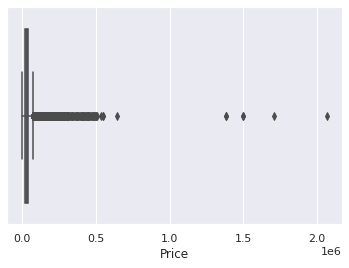

In [16]:
#Plotting the graphs of data(columns)
sns.boxplot(x=df['Price'])

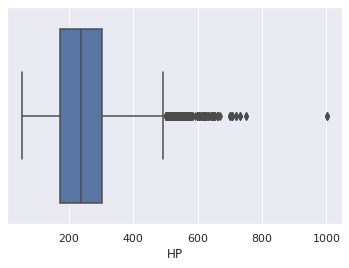

In [17]:
sns.boxplot(x=df['HP'])

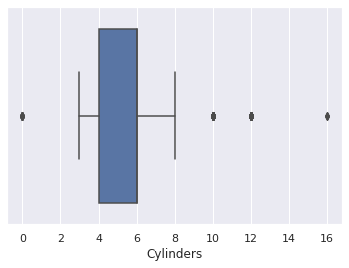

In [18]:
sns.boxplot(x=df['Cylinders'])

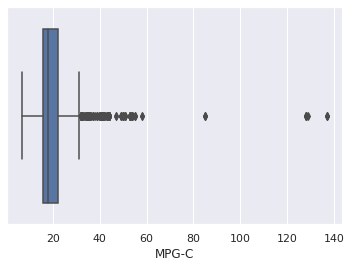

In [19]:
sns.boxplot(x=df['MPG-C'])

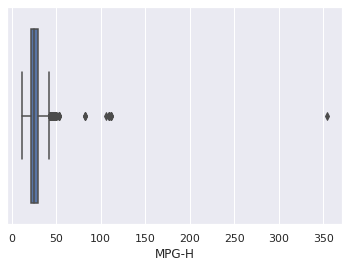

In [20]:
sns.boxplot(x=df['MPG-H'])

In [21]:
#Finding IQR
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


In [22]:
#Removing outliers
df=df[~((df<(Q1-1.5*IQR)) |(df>(Q3+1.5*IQR))).any(axis=1)]
df.shape

(8546, 13)

**6.What are the most represented car brands?**

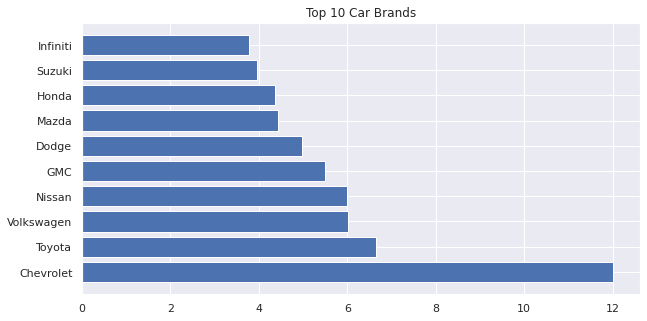

In [23]:
#Percentage of car per brand
counts=df['Make'].value_counts()*100/sum(df['Make'].value_counts())
#Top 10 car brands
popular_labels=counts.index[:10]
#Plot
plt.figure(figsize=(10,5))
plt.barh(popular_labels,width=counts[:10])
plt.title('Top 10 Car Brands')
plt.show()

In [24]:
prices=df[['Make','Price']].loc[(df['Make']=='Chevrolet')|
                                (df['Make']=='Ford')|
                                (df['Make']=='Volkswagen')|
                                (df['Make']=='Toyota')|
                                (df['Make']=='Dodge')|
                                (df['Make']=='Nissan')|
                                (df['Make']=='GMC')|
                                (df['Make']=='Honda')|
                                (df['Make']=='Mazda')].groupby('Make').mean()
print(prices)
          

                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


**7.Correlation matrix**

In [25]:
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


**High correlation between**


a)Cylinders & HP
b)Highway mpg & City mpg



The more cylinders there are,the more powerful the car is

**High anticorrelation**

a)Cylinders & Highway mpg

Highway mpg/Engine Cylinders have a strong negative correlation with highway and city MPG because lower MPG figures mean higher fuel consumption.

**8.Exploratory Data Analysis**

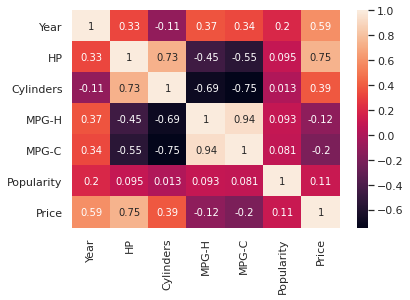

In [26]:
#Plotting Correlation matrix
corrMatrix=df.corr()
sns.heatmap(corrMatrix,annot=True)

**Scatterplot**

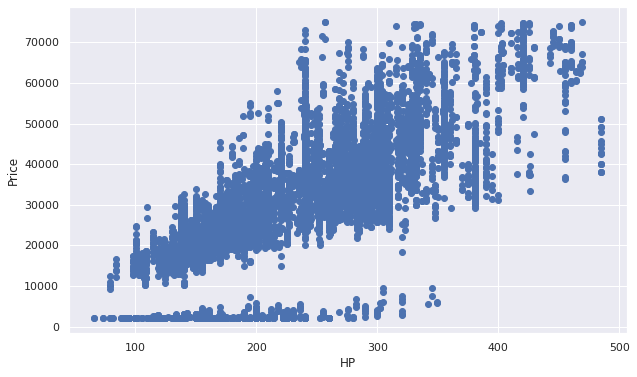

In [27]:
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(df['HP'],df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

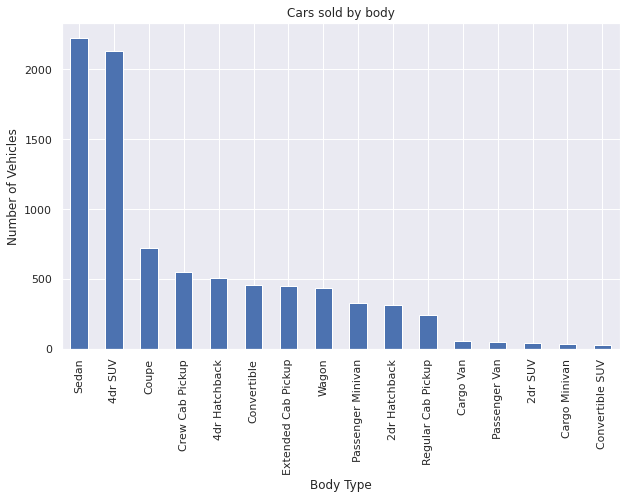

In [28]:
df['Vehicle Style'].value_counts().plot.bar(figsize=(10,6))
#Barchart for car 'body' variable
plt.title("Cars sold by body")
plt.ylabel('Number of Vehicles')
plt.xlabel('Body Type');

Text(0.5, 0, 'Count of vehicles')

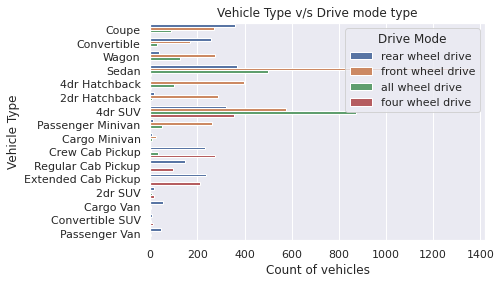

In [29]:
#Vehicle Style type and Drive type analysis
sns.countplot(y='Vehicle Style',data=df,hue='Drive Mode')
plt.title("Vehicle Type v/s Drive mode type")
plt.ylabel('Vehicle Type')
plt.xlabel('Count of vehicles')

In [30]:
#Create a new column 'Price_group' and assign the value based on car price
df['price_group']=pd.cut(df['Price'],[0,20000,40000,60000,80000,100000,600000],
                         labels=['<20k','20-39k','40-59k','60-79k','80-99k','>100k'],include_lowest=True)
df['price_group']=df['price_group'].astype(object)

Text(0.5, 0, 'Price Group')

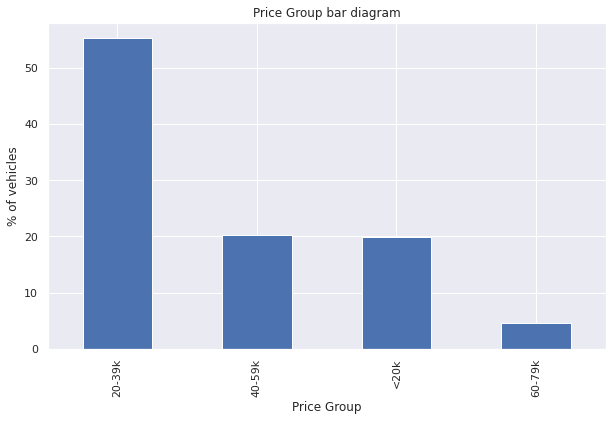

In [31]:
(df['price_group'].value_counts()/len(df)*100).plot.bar(figsize=(10,6))
plt.title("Price Group bar diagram")
plt.ylabel('% of vehicles')
plt.xlabel('Price Group')


**9.Base ML model**

In [32]:
X=df[['Popularity','Year','HP','Cylinders','MPG-H','MPG-C']].values
y=df['Price'].values
     

In [33]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_y=StandardScaler()
X=sc_X.fit_transform(X)
y=sc_y.fit_transform(y.reshape(-1,1))



In [34]:
#Splitting the datasetinto the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [35]:
#Fitting Multiple Linaer Regression to the Training set
from sklearn.linear_model import LinearRegression 
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

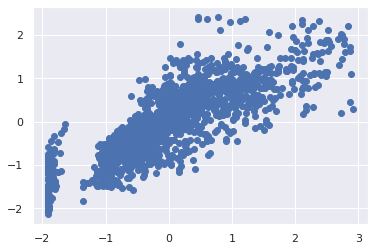

In [36]:
#Predicting the Test set results
y_pred=regressor.predict(X_test)
plt.scatter(y_test,y_pred)

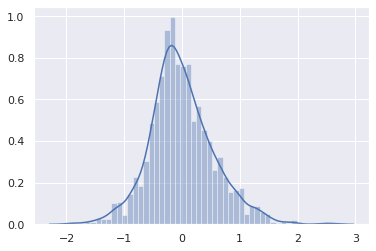

In [37]:
sns.distplot((y_test-y_pred),bins=50)

In [38]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 Score:',metrics .r2_score(y_test,y_pred))

Mean Absolute Error: 0.4256788993790108
Root Mean Squared Error: 0.5578433473146853
R2 Score: 0.6800475541161142


**10.Spot checking algorithms**

In [39]:
#Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
X_poly=poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly,y_train)
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

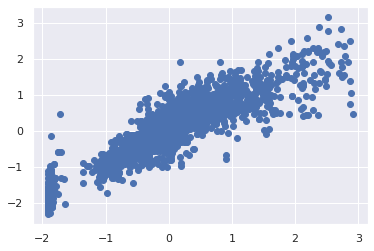

In [40]:
#Predicting a new result with Polynomial Regression
y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))
plt.scatter(y_test,y_pred)

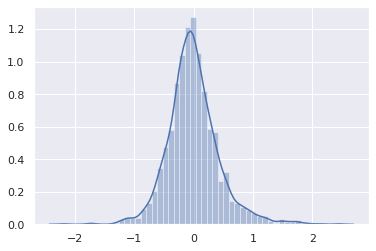

In [41]:
sns.distplot((y_test-y_pred),bins=50)

In [42]:
print('Mean Squared Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

Mean Squared Error: 0.31573061752350967
Root Mean Squared Error: 0.4351456478672659
R2 Score: 0.8053160242314694


In [43]:
#Fitting SVR to the dataset
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

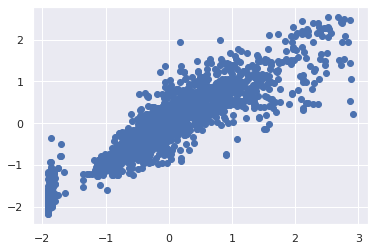

In [44]:
#Predicting a new result
y_pred=regressor.predict(X_test)
plt.scatter(y_test,y_pred)

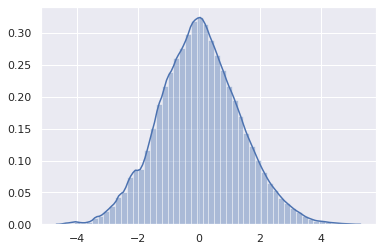

In [45]:
sns.distplot((y_test-y_pred),bins=50)

In [46]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.29633619416546725
Root Mean Squared Error: 0.42527355451237575
R2 Score: 0.814049362176249


In [47]:
#Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=300,random_state=0)
regressor.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

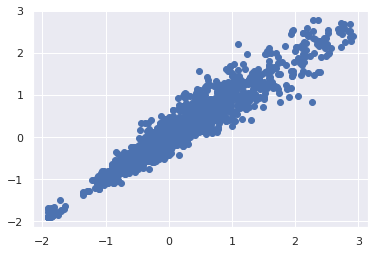

In [48]:
y_pred=regressor.predict(X_test)
plt.scatter(y_test,y_pred)

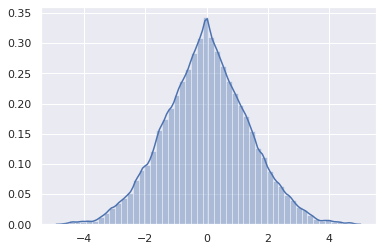

In [49]:
sns.distplot((y_test-y_pred),bins=50)

In [50]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.17769704010247667
Root Mean Squared Error: 0.24743996001244517
R2 Score: 0.9370492959370332
